Objective: Applying Tf-idf to the Text and then featurizing them and applying the resultant sparse matrix to Logistic
           Regression and Linear-SVM and finding the Log-Loss.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np


In [2]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# converting question1 to list
questions = list(df['question1']) 

tfidf = TfidfVectorizer(lowercase=False)
tf_sp = tfidf.fit_transform(questions)


In [5]:
tf_sp

<404290x84717 sparse matrix of type '<class 'numpy.float64'>'
	with 4045225 stored elements in Compressed Sparse Row format>

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# converting question2 to list
questions_1 = list(df['question2']) 

tfidf_1 = TfidfVectorizer(lowercase=False)
tf_sp_1 = tfidf_1.fit_transform(questions_1)


In [7]:
tf_sp_1

<404290x78351 sparse matrix of type '<class 'numpy.float64'>'
	with 4101330 stored elements in Compressed Sparse Row format>

In [8]:
from scipy.sparse import hstack

sc = hstack((tf_sp, tf_sp_1)) # stacking the sparse matrices

In [9]:
sc.shape # shape of combined sparse matrices

(404290, 163068)

In [10]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [11]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

df_1  = df1.merge(df2, on='id',how='left') # merging two data frames

sc1 = hstack((sc, df_1)) # stacking the data frames with the sparse matrix

In [46]:
sc1 # shape of final sparse matrix

<404290x163096 sparse matrix of type '<class 'numpy.float64'>'
	with 18195179 stored elements in COOrdinate format>

In [47]:
sc_f = sc1.tocsr() # conveting to Compressed Row Format

In [75]:
from sklearn.utils import resample

# randomly sample 10k rows from the sparse matrix
rand_samp = resample(sc_f, replace=True, n_samples=10000, random_state=42)

In [49]:
rand_samp

<10000x163096 sparse matrix of type '<class 'numpy.float64'>'
	with 450639 stored elements in Compressed Sparse Row format>

In [50]:
# dataframe of nlp features
df1.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
340551,340551,0,0.000000,0.000000,0.499975,0.166664,0.166664,0.083333,0.0,0.0,6.0,9.0,45,41,41,46,0.105263
141319,141319,0,0.249997,0.095238,0.749991,0.239999,0.470585,0.133333,0.0,0.0,43.0,38.5,60,32,33,47,0.081395
201841,201841,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0.000000
386560,386560,1,0.833319,0.555549,0.333322,0.124998,0.666659,0.299999,1.0,1.0,11.0,14.5,87,67,63,63,0.301887
201112,201112,1,0.499988,0.499988,0.666644,0.499988,0.571420,0.499994,1.0,1.0,1.0,7.5,75,67,69,68,0.358974


In [51]:
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [108]:
#y = rand_samp[:, 163069:163070]

In [112]:
#y = y.toarray()

In [119]:
#y = pd.DataFrame(y)

In [125]:
y1 = resample(df_1['is_duplicate'], replace=True, n_samples=10000, random_state=42)

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(rand_samp, y1, shuffle=True, stratify=y, test_size=0.3)

In [127]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (7000, 163096)
Number of data points in test data : (3000, 163096)


In [128]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()

For values of alpha =  1e-05 The log loss is: 0.6512701978869877
For values of alpha =  0.0001 The log loss is: 0.6512701979465695
For values of alpha =  0.001 The log loss is: 0.6512701978669075
For values of alpha =  0.01 The log loss is: 0.651270197879984
For values of alpha =  0.1 The log loss is: 0.6512701978789429
For values of alpha =  1 The log loss is: 0.6512701978789089
For values of alpha =  10 The log loss is: 0.6512701980945694


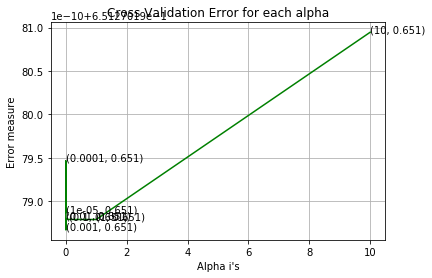

For values of best alpha =  0.001 The train log loss is: 0.6579354143914824
For values of best alpha =  0.001 The test log loss is: 0.6512701978669075
Total number of data points : 3000


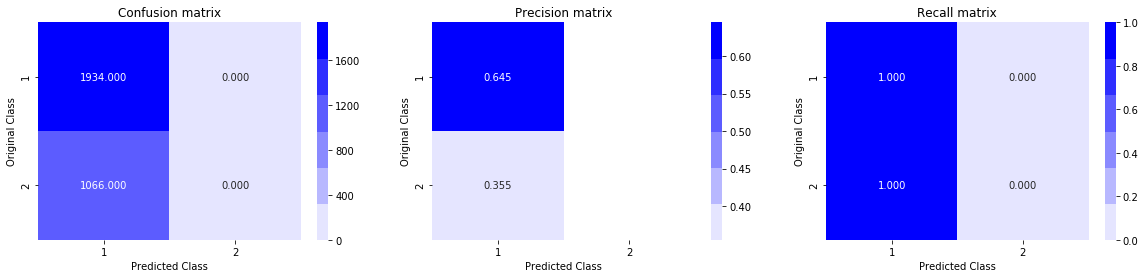

In [129]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sns

alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.6510182859676245
For values of alpha =  0.0001 The log loss is: 0.6510182851987821
For values of alpha =  0.001 The log loss is: 0.6510182840252091
For values of alpha =  0.01 The log loss is: 0.6512701216880912
For values of alpha =  0.1 The log loss is: 0.6510183300648094
For values of alpha =  1 The log loss is: 0.6510789166111887
For values of alpha =  10 The log loss is: 0.6510745961272152


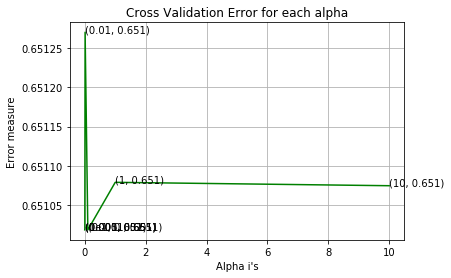

For values of best alpha =  0.001 The train log loss is: 0.6579724374951899
For values of best alpha =  0.001 The test log loss is: 0.6510182840252091
Total number of data points : 3000


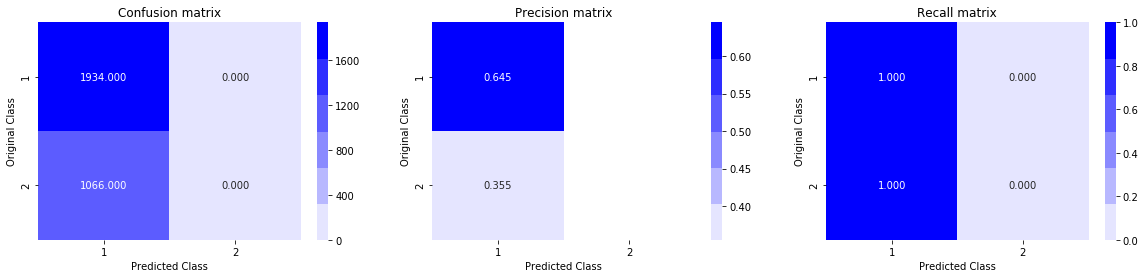

In [130]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
Summary: 
         We applied Tf-idf for question1 and question2 and then stacked the sparse matrices with the the features calculated 
        before hand and then converted the final sparse matrix to Compressed-Sparse-Row(csr) format and then randomly split
        the sparse matrix 10k rows for easy computations. Then, split the data into Train and Test using train_test_split.
        Then, we applied Logistic Regression and Linear-SVM on the sparse matrix and found the Log-Loss of both the models and 
        found that Linear-SVM performs slightly better than Logistic Regression.